In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from kjetilplot import savePlot
from typing import Type
plt.style.use('ggplot')

# Linear transport

## Characteristics

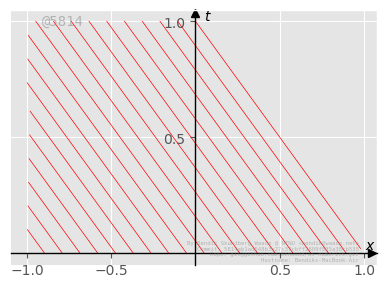

In [3]:
a = 1
M = 50
x0 = np.linspace(-1,1, 20)
#chars = np.zeros((M,len(x0)))
t = np.linspace(0,1,M)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.spines['left'].set_position(('data',0.0))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['bottom'].set_color('black')
ax.set_xticks([-1,-.5,.5,1])
ax.set_yticks([.5,1])
ax.plot(0.986, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, .986, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.annotate('$t$', (.05,1.005))
ax.annotate('$x$', (1.005,.02))
# ax.set_xlabel('$x$')
# ax.set_ylabel('$t$')
# ax.set_ylim(-.1,1.1)

for i, x in enumerate(x0):
    l = x-a*t
    idx = np.where(abs(x-a*t)<1)
    ax.plot(l[idx], t[idx], color='red', linewidth=.5)
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-.3,1.3)
# plt.savefig('characteristics/lin_a{a}.pdf')
plt.tight_layout()
savePlot(f'characteristics/lin_a{a}.pdf')
plt.show()

# Burger's equation

## Characteristics

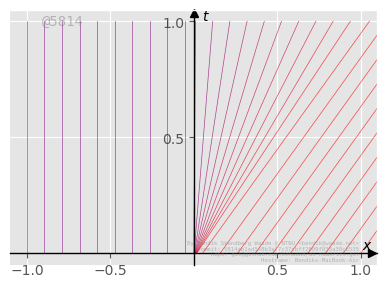

In [40]:
a = lambda x: 0 if x <= 0 else 1
# a = lambda x: -np.sin(np.pi*x)
M = 50
x0 = np.linspace(-1,1, 20)
cmap = mpl.colormaps['brg']
normalizer = mpl.colors.Normalize(vmin=-1,vmax=3)
col = lambda x: cmap(normalizer(x))
#chars = np.zeros((M,len(x0)))
t = np.linspace(0,1,M)
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.spines['left'].set_position(('data',0.0))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['bottom'].set_color('black')
ax.set_xticks([-1,-.5,.5,1])
ax.set_yticks([.5,1])
ax.plot(0.986, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, .986, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.annotate('$t$', (.05,1.005))
ax.annotate('$x$', (1.005,.02))
# ax.set_xlabel('$x$')
# ax.set_ylabel('$t$')
# ax.set_ylim(-.1,1.1)

for i, x in enumerate(x0):
    l = x+a(x)*t
    # idx = np.where(l<t/2) if x<=0 else np.where(l>t/2)
    ax.plot(l, t, color=col(a(x)), linewidth=.5, alpha=.7)
    # if x>=0 and x<.5:
    #     t_rar = np.linspace(2*x, 1, M)
    #     x_above = np.repeat(x, M)
    #     ax.plot(x_above, t_rar, color=col(a(0)), linewidth=.5, alpha=.7)
    #     x_across = np.linspace(x, 1-x, M)
    #     ax.plot(x_across, t_rar, color=col(a(1)), linewidth=.5, alpha=.7)
# ax.plot(t/2, t, color='red')
for i, speed in enumerate(np.linspace(0.01,0.92,10)):
    l = i*.002 + speed*t
    ax.plot(l, t, color=col(speed), linewidth=.5, alpha=.7)
ax.set_xlim(-1.1,1.1)
# plt.savefig('characteristics/lin_a{a}.pdf')
plt.tight_layout()
savePlot(f'characteristics/burgers_rarefact_entropy.pdf')
plt.show()

## Solution

INFO: CFL number is 0.75


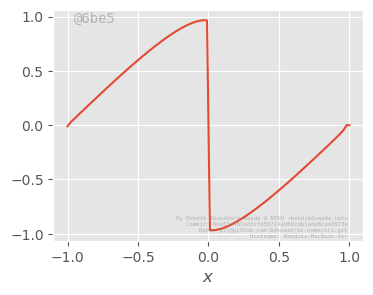

In [45]:
F = lambda u: u**2/2
init = lambda x: -np.sin(np.pi*x)
q = lambda p: 0.
def LW_step(u_w, u_p, u_e, q_p, dt, dx):
    r = dt/dx
    F_w, F_p, F_e = F(u_w), F(u_p), F(u_e)
    u_iph = (u_p+u_e)/2
    u_imh = (u_p+u_w)/2
    tmp = u_p - r/2*(F_e-F_w)
    nosource = tmp + r/2*(u_iph*(F_e-F_p) - u_imh*(F_p-F_w))
    return nosource + dt*q_p
def get_sol(tgrid, xgrid):
    cfl_max_speed = 3
    dt = tgrid[1]-tgrid[0]
    dx = xgrid[1]-xgrid[0]
    print(f'INFO: CFL number is {(cfl:=cfl_max_speed*dt/dx):.2f}')
    if cfl > 1.:
        print('Returning empty')
        return np.array([])
    V = np.zeros((len(xgrid), len(tgrid)))
    V[:,0] = init(xgrid)
    for n,t in enumerate(tgrid[:-1]):
        for i,x in enumerate(xgrid[1:-1]):
            q_p = q((t, x))
            V[i,n+1] = LW_step(V[i-1,n], V[i,n], V[i+1,n], q_p, dt, dx)
        
        V[0,n+1] = LW_step(V[-1,n], V[0,n], V[1,n], q((t,-1)), dt, dx)
        V[-1,n+1] = LW_step(V[-2,n], V[-1,n], V[0,n], q((t,1-dx)), dt, dx)
    return V

tgrid = np.linspace(0,1,200)
xgrid = np.linspace(-1,1,100)
V = get_sol(tgrid, xgrid)
# plot_idx = [0,50,100]
# fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,3))
# ax1.plot(xgrid, V[:,plot_idx[0]])
# ax2.plot(xgrid, V[:,plot_idx[1]])
# ax3.plot(xgrid, V[:,plot_idx[2]])
# for ax in (ax1,ax2,ax3):
#     ax.set_xlabel('$x$')
# print(f'Times: {tgrid[0]:.2f}, {tgrid[plot_idx[1]]:.2f}, {tgrid[plot_idx[2]]:.2f}')
# plt.tight_layout()
# savePlot(f'characteristics/burgers_shock_sol.pdf')
idx = 100
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xgrid, V[:,idx])
ax.set_xlabel('$x$')
# plt.tight_layout()
savePlot(f'solutions/burgers_shock_t-{tgrid[idx]:.2f}.pdf')
plt.show()

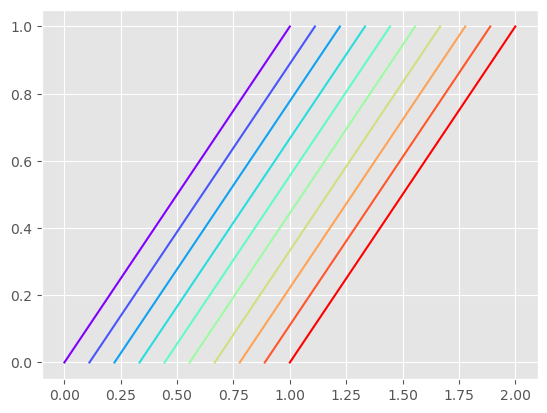

In [63]:
def test():
    import matplotlib as mpl
    x = np.linspace(0,1,10)
    x0 = np.linspace(0,1,10)
    t = np.linspace(0,1,10)
    cmap = mpl.colormaps['rainbow']
    print(cmap)
    fig, ax = plt.subplots(1,1)
    for x in x0:
        ax.plot(x+t,t,color=cmap(x))
    # print(mpl.colormaps['viridis'](x))
test()


# Numerics

In [85]:
import torch

class Mesh:
    def __init__(self,faces, T, N):
        '''Assumes uniform faces'''
        self.faces = faces
        self.centroids = .5*(faces[:-1] + faces[1:])
        self.dx = torch.tensor(faces[1] - faces[0])
        self.M = len(self.centroids)
        self.T = T
        self.N = N
class Scheme:
    def __init__(self, F, dt, dx, periodic):
        '''F is the flux'''
        self.F = F
        self.dt = torch.tensor(dt, requires_grad=False)
        self.dx = torch.tensor(dx, requires_grad=False)
        self.periodic = periodic
    def vectorstep(self, Un):
        raise NotImplementedError()
    def step(self, *args):
        raise NotImplementedError()
class LW(Scheme):
    def __init__(self, F, dt, dx, periodic):
        '''NB! Made for the Burger flux! Uses f' explicitly in _halfstep'''
        super().__init__(F, dt, dx, periodic)
        print(f'INFO: Created scheme with Δt/Δx = {dt/dx:.2f}.')
    def step(self, west, centre, east):
        return centre - self.dt/self.dx*(self._halfstep(centre, east)-self._halfstep(west, centre))
    def _halfstep(self, u_i, u_ip1):
        U_half = (u_ip1+u_i) / 2 - self.dt/(2*self.dx)*(self.F(u_ip1)-self.F(u_i))
        return self.F(U_half)
    def vectorstep(self, Un):
        west = torch.roll(Un, 1)
        east = torch.roll(Un,-1)
        if not self.periodic:
            west[0] = west[1]
            east[-1] = east[-2]
        return self.step(west, Un, east)
class Godunov(Scheme):
    def __init__(self, F, dt, dx, periodic):
        '''Made for convex fluxes with minimum in 0. Assumes batch dimension'''
        super().__init__(F, dt, dx, periodic)
        print(f'INFO: Created scheme with Δt/Δx = {dt/dx:.2f}.')
    def step(self, west, centre, east):
        return centre - self.dt/self.dx*(self._halfstep(centre,east)-self._halfstep(west,centre))
    def _halfstep(self, u_i, u_ip1):
        omega = torch.zeros_like(u_i)
        centre_max = torch.maximum(u_i, omega)
        east_min = torch.minimum(u_ip1, omega)
        return torch.maximum(self.F(centre_max), self.F(east_min))
    def vectorstep(self, Un):
        west = torch.roll(Un, 1)
        east = torch.roll(Un,-1)
        if not self.periodic:
            west[0] = west[1]
            east[-1] = east[-2]
        return self.step(west, Un, east)
class LF(Scheme):
    def __init__(self, F, dt, dx, periodic):
        '''Made for convex fluxes with minimum in 0. Assumes batch dimension'''
        super().__init__(F, dt, dx, periodic)
        print(f'INFO: Created scheme with Δt/Δx = {dt/dx:.2f}.')
    def step(self, west, centre, east):
        return centre - self.dt/self.dx*(self._halfstep(centre,east)-self._halfstep(west,centre))
    def _halfstep(self, u_i, u_ip1):
        return (self.F(u_ip1) + self.F(u_i)) / 2 - self.dx/(2*self.dt)*(u_ip1-u_i)
    def vectorstep(self, Un):
        '''Assumes periodic boundary'''
        west = torch.roll(Un, 1)
        east = torch.roll(Un,-1)
        if not self.periodic:
            west[0] = west[1]
            east[-1] = east[-2]
        return self.step(west, Un, east)
def test_method(method: Type[Scheme], name: str):
    amax = 1
    T = .5
    cfl = .5
    M = 50
    N = int(amax*T*M/(2*cfl))
    print(f'INFO: Using N = {N}.')
    dt = T / (N)
    faces = torch.linspace(-1,1,M, requires_grad=False)

    shock_init = lambda x: torch.where(x<0.,  1., 0.)
    raref_init = lambda x: torch.where(x<0., -1., 1.)
    # source = lambda t,x,u: torch.sqrt(torch.abs(u))
    mesh = Mesh(faces, T, N)
    scheme = method(lambda u:u**2/2,dt,mesh.dx, periodic=False)

    U_shock = shock_init(mesh.centroids)
    U_raref = raref_init(mesh.centroids)
    t_check = 0
    for n in range(N):
        U_shock = scheme.vectorstep(U_shock)
        U_raref = scheme.vectorstep(U_raref)
        t_check += dt
    print(f'Finished at t = {t_check}')
    exact_grid = torch.linspace(-1,1, 200).detach()
    exact_shock = torch.where(exact_grid<.25, 1., 0.)
    exact_raref = torch.where(exact_grid<-.5, -1., torch.where(exact_grid<.5, exact_grid/.5, 1.))

    plt.style.use('ggplot')
    lfig, lax = plt.subplots(1,1,figsize=(6,5))
    lax.plot(mesh.centroids, U_shock, '-o', markerfacecolor='none', label=name)
    lax.plot(exact_grid, exact_shock, color='black', linewidth=.8, label='Exact')
    lax.legend()

    rfig, rax = plt.subplots(1,1,figsize=(6,5))
    rax.plot(mesh.centroids, U_raref, '-o', markerfacecolor='none', label=name)
    rax.plot(exact_grid, exact_raref, color='black', linewidth=.8, label='Exact')
    rax.legend()
    return lfig, rfig

## Godunov

INFO: Using N = 25.
INFO: Created scheme with Δt/Δx = 0.49.
Finished at t = 0.5000000000000001


/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/2352020867.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(faces[1] - faces[0])
/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/2352020867.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(dx, requires_grad=False)


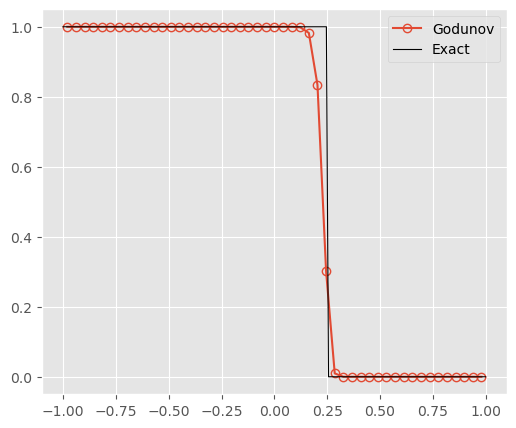

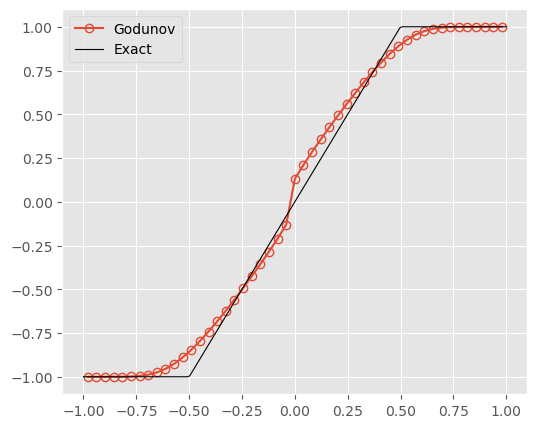

In [79]:
lfig, rfig = test_method(Godunov, 'Godunov')
plt.show()
lfig.savefig('img/solutions/godunov_shock.pdf')
rfig.savefig('img/solutions/godunov_rarefact.pdf')

## Lax-Friedrich

INFO: Using N = 25.
INFO: Created scheme with Δt/Δx = 0.49.
Finished at t = 0.5000000000000001


/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/2352020867.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(faces[1] - faces[0])
/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/2352020867.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(dx, requires_grad=False)


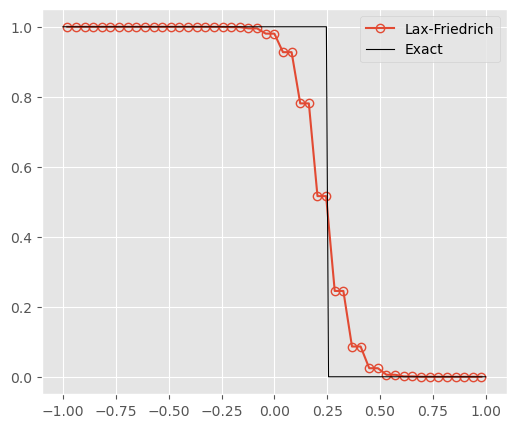

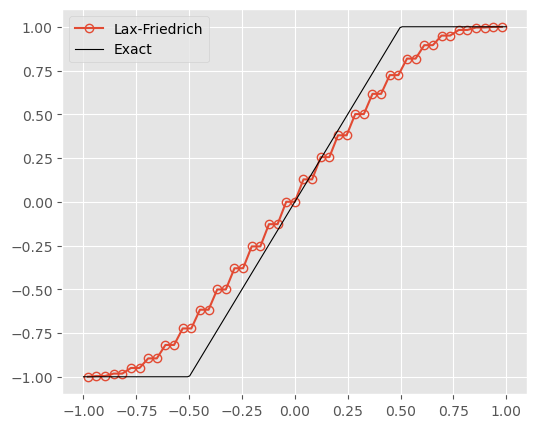

In [80]:
lfig, rfig = test_method(LF, 'Lax-Friedrich')
plt.show()
lfig.savefig('img/solutions/LF_shock.pdf')
rfig.savefig('img/solutions/LF_rarefact.pdf')

## Lax-Wendroff

INFO: Using N = 25.
INFO: Created scheme with Δt/Δx = 0.49.
Finished at t = 0.5000000000000001


/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/3866332432.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(faces[1] - faces[0])
/var/folders/tr/2zvhxs257xd2lr79418zvxh80000gn/T/ipykernel_73916/3866332432.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dx = torch.tensor(dx, requires_grad=False)


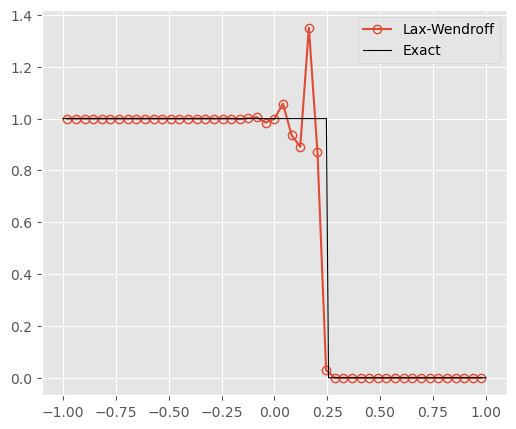

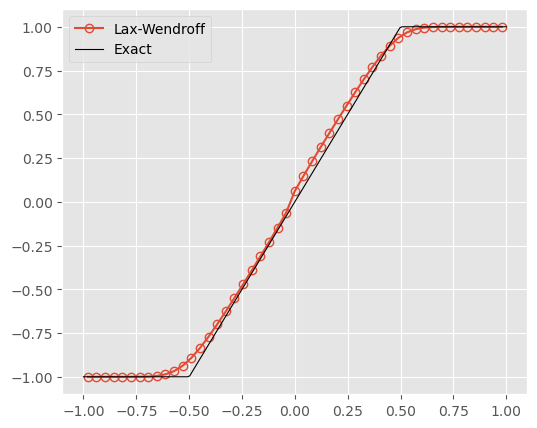

In [86]:
lfig, rfig = test_method(LW, 'Lax-Wendroff')
plt.show()
lfig.savefig('img/solutions/LW_shock.pdf')
rfig.savefig('img/solutions/LW_rarefact.pdf')

# Neural networks

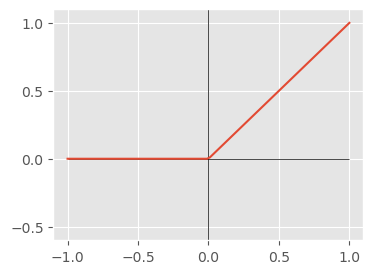

In [47]:
relu = lambda x: np.maximum(x, 0)
sigmoid = lambda x: 1/(1+np.exp(-x))
tanh = lambda x: np.tanh(x)
ylims = (-.6, 1.1)

x = np.linspace(-1,1,100)
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.set_yticks([-1,-.5,0,.5,1])
ax.set_ylim(*ylims)
ax.hlines([0], x[0], x[-1], color='black', linewidth=.5)
ax.vlines([0], *ylims, color='black', linewidth=.5)
ax.plot(x, relu(x))
fig.savefig('img/network/relu.pdf')
plt.show()